In [43]:
import pandas as pd
import matplotlib.pyplot as plt


Analyse avec Accident_Severity en variable cible

In [44]:
data = pd.read_csv('Data_for_analysis.csv')
y = data['Accident_Severity']

X = data.drop(columns = ['Accident_Severity','Light_Conditions','Road_Surface_Conditions',
                         'Unnamed: 0','Number_of_Casualties','Number_of_Vehicles'])


3) Calcul du VIF

In [45]:
X = X.astype(float)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.head(100)

,Variable,VIF
0,2021-02,2.256283
1,2021-03,4.185227
2,2021-04,6.707610
3,2021-05,12.337243
4,2021-06,11.687912
5,2021-07,14.441909
6,2021-08,9.692886
7,2021-09,5.837385
8,2021-10,3.463606
9,2021-11,2.612517


VIF tres elevé pour certaines variables bcp de multicolinéarité, une regression de Poisson n'est pas idéale 

In [47]:
import statsmodels.api as sm

X = sm.add_constant(X)
ridge_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge = ridge_poisson.params

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

summary_table = poisson_model.summary2().tables[1]
summary_table["Coefficient (Ridge)"] = coef_ridge  # Ajouter les coefficients Ridge
summary_table = summary_table[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table.head(100)


,Coefficient (Ridge),Std.Err.,z,P>|z|
const,-0.001105,0.959889,0.019374,0.984543
2021-02,-0.002043,0.173174,-0.181190,0.856218
2021-03,-0.001287,0.222777,-0.040567,0.967641
2021-04,0.016845,0.295915,0.312780,0.754448
2021-05,-0.014739,0.365829,0.044683,0.964360
2021-06,0.011888,0.409350,0.294126,0.768662
2021-07,0.006045,0.387502,0.206177,0.836653
2021-08,-0.005074,0.321906,0.084540,0.932627
2021-09,0.028688,0.257734,0.389588,0.696841
2021-10,-0.018056,0.190156,-0.371341,0.710384


Très mauvais résultats avec des quasiment aucun des coefficients significatifs. Nous tentons  une autre approche en faisant une ACP, qui servirait a regrouper des variables colinéaires sur un même axe et simplifierait notre analyse

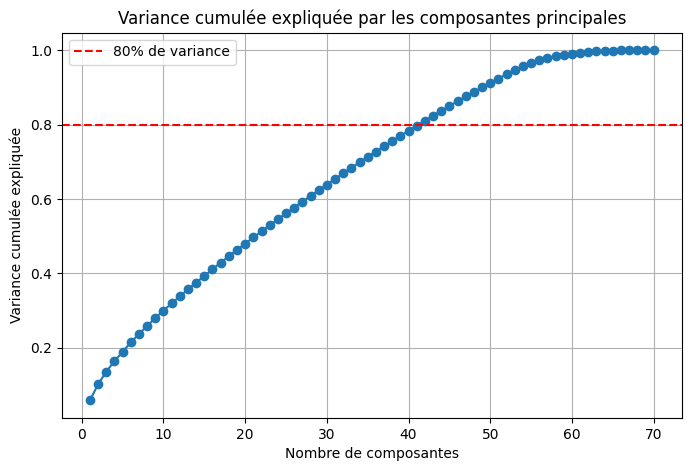

In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réalisation de l'ACP sur toutes les composantes
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
X.shape

(1878, 70)

Nous avons voulu réduire les dimensions de notre modèle avec une ACP mais, pour atteindre un modèle qui explique au moins 80% de la variance, il nous aurait fallu choisir 50 composantes principales, ce qui est un chiffre bien trop élevé et enlève tout l'intérêt de l'ACP.

Stepwise Selection:

Forward step : tester l’ajout de chaque variable non incluse pour identifier celle qui diminue le plus l’AIC.

In [50]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], verbose=True):
    """
    Sélection de variables par régression pas à pas basée sur l’AIC.
    Utilise un modèle de Poisson (GLM) pour ajouter ou retirer des variables.
    
    Parameters:
      X: DataFrame des variables explicatives.
      y: Série de la variable cible.
      initial_list: Liste initiale (peut être vide).
      verbose: Affichage des étapes.
      
    Returns:
      La liste des variables sélectionnées.
    """
    included = list(initial_list)
    while True:
        changed = False
        
        # ----- Étape Forward : Ajouter la variable qui minimise l'AIC -----
        excluded = list(set(X.columns) - set(included))
        best_aic = float('inf')
        best_feature = None
        for new_column in excluded:
            model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included + [new_column]])),
                           family=sm.families.Poisson()).fit()
            current_aic = model.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_feature = new_column
        if best_feature is not None:
            if len(included) == 0:
                current_model_aic = float('inf')
            else:
                current_model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included])),
                                       family=sm.families.Poisson()).fit()
                current_model_aic = current_model.aic
            if best_aic < current_model_aic:
                included.append(best_feature)
                changed = True
                if verbose:
                    print('Ajouter {} avec AIC = {:.2f}'.format(best_feature, best_aic))
        
        # ----- Étape Backward : Supprimer la variable qui améliore l'AIC -----
        if len(included) > 0:
            model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[included])),
                           family=sm.families.Poisson()).fit()
            current_aic = model.aic
            aic_with_drop = {}
            for feature in included:
                features_subset = list(included)
                features_subset.remove(feature)
                if len(features_subset) == 0:
                    aic_with_drop[feature] = float('inf')
                else:
                    temp_model = sm.GLM(y, sm.add_constant(pd.DataFrame(X[features_subset])),
                                        family=sm.families.Poisson()).fit()
                    aic_with_drop[feature] = temp_model.aic
            worst_feature = min(aic_with_drop, key=aic_with_drop.get)
            worst_aic = aic_with_drop[worst_feature]
            if worst_aic < current_aic:
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print('Supprimer {} pour AIC = {:.2f}'.format(worst_feature, worst_aic))
        
        if not changed:
            break

    return included

# Exemple d'utilisation :
# Supposons que "data_encoded" est votre DataFrame final avec 'Accident_Severity' comme variable cible.


selected_features_aic = stepwise_selection(X, y)
print("Variables sélectionnées :", selected_features_aic)

X_aic = X[selected_features_aic]

Ajouter Speed_limit avec AIC = 4159.99
Ajouter Junction_Detail_Roundabout avec AIC = 4159.81
Variables sélectionnées : ['Speed_limit', 'Junction_Detail_Roundabout']


Autre méthode de sélection de variable: Elastic Net combine la pénalité L1 et L2, initialise les coefs à 0 si ne sont pas révélateurs

In [51]:
import statsmodels.api as sm
import pandas as pd

# Supposons que X et y soient vos variables explicatives et la variable cible
# On ajoute une constante aux variables explicatives
X_const = sm.add_constant(X)

# Choix d'une valeur de régularisation
alpha_value = 0.1  # à ajuster selon vos besoins

# Ajustement d'un modèle de Poisson avec régularisation Elastic Net
# Ici, L1_wt=0.5 signifie un mélange égal entre L1 et L2.
model_reg = sm.GLM(y, X_const, family=sm.families.Poisson()).fit_regularized(alpha=alpha_value, L1_wt=0.5)

# Affichage des coefficients
print("Coefficients du modèle régularisé :")
print(model_reg.params)

# Sélection des variables dont le coefficient n'est pas négligeable (seuil arbitraire, par exemple 1e-4)
selected_features_en = model_reg.params[model_reg.params.abs() > 1e-4].index.tolist()

# Supprimer la constante si présente
if 'const' in selected_features_en:
    selected_features_en.remove('const')

print("Variables sélectionnées :", selected_features_en)
X_en = X[selected_features_en]


Coefficients du modèle régularisé :
const                                                   0.000000
2021-02                                                 0.000000
2021-03                                                 0.000000
2021-04                                                 0.000000
2021-05                                                 0.000000
2021-06                                                 0.000000
2021-07                                                 0.000000
2021-08                                                 0.000000
2021-09                                                 0.000000
2021-10                                                 0.000000
2021-11                                                 0.000000
2021-12                                                 0.000000
2022-01                                                 0.000000
2022-02                                                 0.000000
2022-03                                               

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import PoissonRegressor



# Création du modèle de régression Poisson
poisson_model = PoissonRegressor(alpha=0.1, max_iter=1000)

# On choisit le nombre de variables à conserver (par exemple 10)
n_features_to_select = 10
selector = RFE(estimator=poisson_model, n_features_to_select=n_features_to_select, step=1)
selector = selector.fit(X_scaled, y)

selected_features_rfe = X.columns[selector.support_]
print("Variables sélectionnées par RFE :", selected_features_rfe.tolist())
X_rfe = X[selected_features_rfe]


Variables sélectionnées par RFE : ['2021-09', 'DayLengthHours', 'MinTemperature', 'Speed_limit', 'Urban_or_Rural_Area', 'Junction_Detail_Roundabout', 'Road_Type_Slip road', 'Time_Category_Matin', 'Time_Category_Midi', 'Time_Category_Après-midi']


Sélection via un modèle d'arbre:

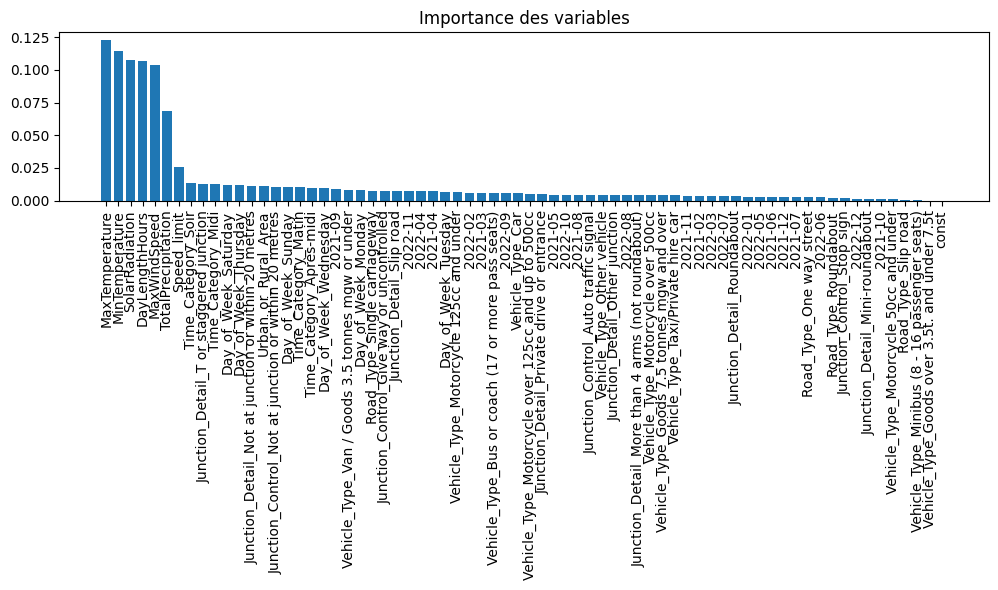

Variables retenues par seuil d'importance (>= 0.01) : ['DayLengthHours', 'MaxTemperature', 'MaxWindSpeed', 'MinTemperature', 'SolarRadiation', 'Speed_limit', 'TotalPrecipitation', 'Urban_or_Rural_Area', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Junction_Control_Not at junction or within 20 metres', 'Junction_Detail_Not at junction or within 20 metres', 'Junction_Detail_T or staggered junction', 'Time_Category_Matin', 'Time_Category_Midi', 'Time_Category_Soir']


In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Création d'un modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Récupération et tri des importances
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
selected_features_rf = X.columns[indices]

# Affichage graphique des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), selected_features_rf, rotation=90)
plt.tight_layout()
plt.show()

# Vous pouvez ensuite retenir par exemple les variables dont l'importance est supérieure à un seuil.
threshold = 0.01
selected_features_rf_threshold = X.columns[importances >= threshold]
print("Variables retenues par seuil d'importance (>= 0.01) :", selected_features_rf_threshold.tolist())
X_tree = X[selected_features_rf_threshold]


Nous réappliquons la régression de poisson à chacun des nouveaux modèles et nous ne garderons que celui avec de meilleurs résultats

In [54]:
#1) avec AIC

ridge_poisson_aic = sm.GLM(y, X_aic, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_aic = ridge_poisson_aic.params

poisson_model_aic = sm.GLM(y, X_aic, family=sm.families.Poisson()).fit()

summary_table_aic = poisson_model_aic.summary2().tables[1]
summary_table_aic["Coefficient (Ridge)"] = coef_ridge_aic  # Ajouter les coefficients Ridge
summary_table_aic = summary_table_aic[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_aic.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
Speed_limit,0.003802,0.000514,7.589447,3.212741e-14
Junction_Detail_Roundabout,-0.050720,0.081530,-1.378097,1.681735e-01


1.010015e-11 se convertit en :
0.00000000001010015

Valeur p : 1.071450e-01 → 0.1071450

Valeur p : 1.830004e-01 → 0.1830004

In [55]:
#1) avec RFE

ridge_poisson_rfe = sm.GLM(y, X_rfe, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_rfe = ridge_poisson_rfe.params

poisson_model_rfe = sm.GLM(y, X_rfe, family=sm.families.Poisson()).fit()

summary_table_rfe = poisson_model_rfe.summary2().tables[1]
summary_table_rfe["Coefficient (Ridge)"] = coef_ridge_rfe  # Ajouter les coefficients Ridge
summary_table_rfe = summary_table_rfe[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_rfe.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
2021-09,0.032914,0.105800,1.017000,0.309154
DayLengthHours,0.008588,0.006917,1.586417,0.112645
MinTemperature,-0.003887,0.005011,-1.002374,0.316163
Speed_limit,0.002828,0.001381,2.342473,0.019156
Urban_or_Rural_Area,-0.010463,0.047343,-0.048725,0.961138
Junction_Detail_Roundabout,-0.051832,0.082113,-1.319072,0.187145
Road_Type_Slip road,-0.017744,0.238015,-0.758865,0.447933
Time_Category_Matin,-0.032045,0.064633,-1.284623,0.198924
Time_Category_Midi,-0.032269,0.060984,-1.345284,0.178533
Time_Category_Après-midi,-0.040088,0.061193,-1.494451,0.135058


In [56]:

ridge_poisson_tree = sm.GLM(y, X_tree, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_tree = ridge_poisson_tree.params

poisson_model_tree = sm.GLM(y, X_tree, family=sm.families.Poisson()).fit()

summary_table_tree = poisson_model_tree.summary2().tables[1]
summary_table_tree["Coefficient (Ridge)"] = coef_ridge_tree  # Ajouter les coefficients Ridge
summary_table_tree = summary_table_tree[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_tree.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
DayLengthHours,0.010049,0.011883,0.910384,0.362620
MaxTemperature,0.000816,0.009636,0.129001,0.897357
MaxWindSpeed,0.000083,0.002606,0.040467,0.967720
MinTemperature,-0.003938,0.009675,-0.453609,0.650111
SolarRadiation,-0.002597,0.005836,-0.511243,0.609181
Speed_limit,0.002036,0.001714,0.983529,0.325347
TotalPrecipitation,-0.001332,0.005964,-0.230798,0.817472
Urban_or_Rural_Area,-0.025788,0.053522,-0.769605,0.441534
Day_of_Week_Saturday,0.010552,0.065418,0.323862,0.746042
Day_of_Week_Sunday,0.024810,0.070721,0.675453,0.499388


Dernière méthode de sélection: supprimer les variables avec un VIF supérieur à 10:

In [57]:
X_vif = vif_data[vif_data["VIF"]<=10]
X_vif= X[X_vif['Variable']]

ridge_poisson_vif = sm.GLM(y, X_vif, family=sm.families.Poisson()).fit_regularized(alpha=0.1, L1_wt=0.0)


coef_ridge_vif = ridge_poisson_vif.params

poisson_model_vif = sm.GLM(y, X_vif, family=sm.families.Poisson()).fit()

summary_table_vif = poisson_model_vif.summary2().tables[1]
summary_table_vif["Coefficient (Ridge)"] = coef_ridge_vif  # Ajouter les coefficients Ridge
summary_table_vif = summary_table_vif[["Coefficient (Ridge)", "Std.Err.", "z", "P>|z|"]]  # Filtrer les colonnes utiles

pd.set_option("display.max_rows", None)
summary_table_vif.head(10)

,Coefficient (Ridge),Std.Err.,z,P>|z|
2021-02,0.014634,0.121792,0.331669,0.740139
2021-03,0.011724,0.113773,0.260381,0.794570
2021-04,0.036874,0.113129,0.958936,0.337591
2021-08,0.004519,0.107338,0.088538,0.929449
2021-09,0.038230,0.108501,0.935036,0.349770
2021-10,-0.010772,0.111811,-0.323427,0.746372
2021-11,-0.008896,0.101831,-0.262831,0.792681
2021-12,0.012400,0.110992,0.313628,0.753804
2022-01,0.009081,0.131110,0.301727,0.762860
2022-02,0.009255,0.115739,0.228664,0.819130


changement d'y, on se demande si la gravité est >=1 si oui 1 sinon 0

In [58]:
y_bis =np.where(y == 1, 0, 1)
len(y_bis)

1878

In [59]:
model = sm.Logit(y_bis, X)

# Ajustement du modèle avec pénalité Lasso (régularisation L1)
# alpha détermine la force de la pénalisation (à ajuster selon votre problème)
result = model.fit_regularized(method='l1', alpha=0.1)


# Affichage du résumé du modèle
print(result.summary())

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39334040130502856
            Iterations: 589
            Function evaluations: 597
            Gradient evaluations: 589
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1808
Method:                           MLE   Df Model:                           69
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                 0.08447
Time:                        10:01:24   Log-Likelihood:                -735.16
converged:                       True   LL-Null:                       -802.98
Covariance Type:            nonrobust   LLR p-value:                 3.002e-06
                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 70 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
c:\Users\zoero\OneDrive\Bureau\M2\S1\data lake\projet\.venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
